In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as logr
from sklearn.ensemble import RandomForestClassifier as rfc

In [2]:
from sklearn.datasets import load_iris

In [22]:
iris=load_iris()

In [23]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [24]:
svc=SVC()
lr=logr()

In [25]:
rf=rfc()

In [26]:
from sklearn.model_selection import train_test_split as tts

In [81]:
xtrain,xtest,ytrain,ytest=tts(iris.data,iris.target,train_size=0.7)

In [82]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [83]:
lr.score(xtest,ytest)

0.9777777777777777

In [29]:
from sklearn.model_selection import KFold

In [63]:
kf=KFold(n_splits=2)
kf

KFold(n_splits=2, random_state=None, shuffle=False)

In [84]:
def getscore(model,xtrain,xtest,ytrain,ytest):
    model.fit(xtrain,ytrain)
    return model.score(xtest,ytest)

In [85]:
getscore(rf,xtrain,xtest,ytrain,ytest)

0.9333333333333333

In [86]:
from sklearn.model_selection import StratifiedKFold

In [87]:
folds=StratifiedKFold(n_splits=5)

In [104]:
scores_lr=[]
scores_sc=[]
scores_rf=[]

In [100]:
getscore(logr(),xtrain,xtest,ytrain,ytest)

0.7567567567567568

In [105]:
kf=KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [106]:
for itrain,itest in kf.split(iris.data):
    xtrain,xtest,ytrain,ytest=iris.data[itrain],iris.data[itest],iris.target[itrain],iris.target[itest]
    scores_lr.append(getscore(logr(),xtrain,xtest,ytrain,ytest))
    scores_sc.append(getscore(SVC(),xtrain,xtest,ytrain,ytest))
    scores_rf.append(getscore(rfc(),xtrain,xtest,ytrain,ytest))

In [107]:
scores_lr,scores_sc,scores_rf

([1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.8333333333333334],
 [1.0, 1.0, 0.8333333333333334, 0.9333333333333333, 0.7],
 [1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.7333333333333333])

In [109]:
from sklearn.model_selection import cross_val_score

In [111]:
cross_val_score(lr,iris.data,iris.target)

D:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [113]:
cross_val_score(svc,iris.data,iris.target)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [114]:
cross_val_score(rf,iris.data,iris.target)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [116]:
import matplotlib.pyplot as plt

D:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Score')

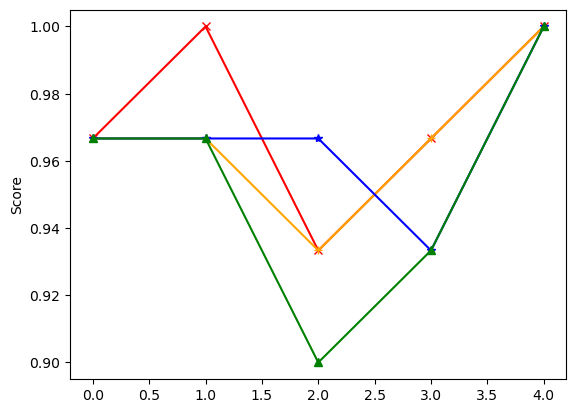

In [126]:
plt.plot(cross_val_score(lr,iris.data,iris.target),color='r',marker='x')
plt.plot(cross_val_score(rf,iris.data,iris.target),color='orange',marker='+')
plt.plot(cross_val_score(svc,iris.data,iris.target),color='b',marker='*')
plt.plot(cross_val_score(rfc(n_estimators=10),iris.data,iris.target,n_jobs=20),color='g',marker='^')
plt.ylabel('Score')